# 🔁 SVM - Transformación de baja dimensión a mayor dimensión

## 1. Kernel en Machine Learning (Métodos Kernel)

En el contexto de *machine learning*, un **kernel** es una función utilizada en algoritmos de aprendizaje, como las Máquinas de Vectores de Soporte (**SVM**), que permite transformar los datos originales en un espacio de características de mayor dimensión. Este proceso facilita la clasificación de datos que no son linealmente separables en su espacio original.

- **Función Kernel**:  
Es una función que toma dos puntos en el espacio de entrada y calcula un producto escalar en un espacio de características de alta dimensión sin necesidad de calcular explícitamente las coordenadas en ese espacio. Esto se conoce como el *"truco del kernel"*.

- **Ejemplos de funciones kernel**:

### • Kernel Lineal:

$$
K(x, y) = x^T y
$$

### • Kernel Gaussiano (RBF):

$$
K(x, y) = \exp\left(-\frac{||x - y||^2}{2\sigma^2}\right)
$$

### • Kernel Polinomial:

$$
K(x, y) = (x^T y + c)^d
$$

> ⚙️ Estos métodos kernel permiten trabajar en espacios de alta dimensión sin realizar explícitamente la transformación, lo que es computacionalmente eficiente y potente para problemas complejos de clasificación.
.


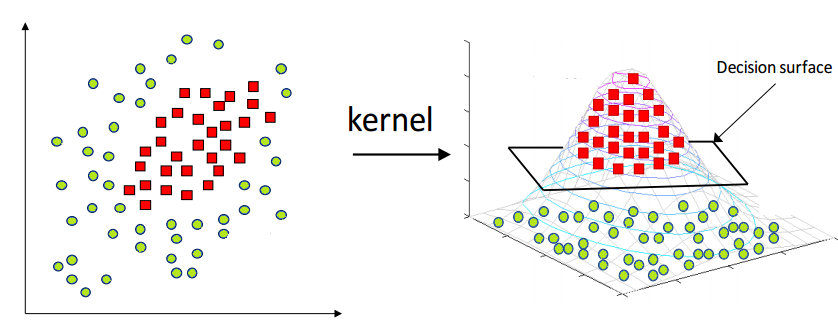

# 🎯 Aplicaciones más relevantes del uso de kernels en SVM

El uso de **kernels** en algoritmos como **Máquinas de Vectores de Soporte (SVM)** permite resolver problemas de clasificación complejos, especialmente cuando los datos no son linealmente separables. A continuación se presentan algunas de las aplicaciones más relevantes:

---

## 1. 🧬 Clasificación de datos biológicos y médicos
- **Ejemplo**: Diagnóstico de cáncer (e.g., *Breast Cancer Dataset*, análisis genómico).
- **Motivación**: Las relaciones entre variables clínicas no suelen ser lineales.
- **Ventaja del kernel**: El kernel RBF o polinomial ayuda a encontrar fronteras complejas entre clases (tumor benigno vs. maligno).

---

## 2. 📷 Reconocimiento de imágenes y visión por computador
- **Ejemplo**: Clasificación de rostros, objetos, o dígitos escritos a mano (*MNIST*).
- **Motivación**: La distribución de píxeles no se puede separar linealmente.
- **Ventaja del kernel**: Permite detectar patrones de bordes, formas y texturas sin necesidad de redes profundas.

---

## 3. 🗣️ Reconocimiento de voz y clasificación de audio
- **Ejemplo**: Identificación de emociones en la voz, comandos hablados.
- **Motivación**: Las señales de audio contienen patrones temporales no lineales.
- **Ventaja del kernel**: Captura relaciones en las frecuencias mediante funciones RBF o polinomiales.

---

## 4. ✉️ Filtrado de spam y clasificación de texto
- **Ejemplo**: Clasificación automática de correos como *spam* o *no spam*.
- **Motivación**: Los datos de texto vectorizados (TF-IDF) generan espacios muy dispersos.
- **Ventaja del kernel**: El kernel permite separar clases en estos espacios de alta dimensionalidad.

---

## 5. 💳 Detección de fraudes en tarjetas de crédito
- **Ejemplo**: Identificar transacciones inusuales o fraudulentas.
- **Motivación**: Los patrones de fraude son raros y no siguen distribuciones simples.
- **Ventaja del kernel**: Permite detectar patrones complejos sin asumir linealidad.

---

## 6. 🌐 Análisis de redes sociales y bioinformática
- **Ejemplo**: Clasificación de nodos en grafos, relaciones entre genes.
- **Motivación**: Las relaciones topológicas o estructurales no se representan fácilmente en un espacio plano.
- **Ventaja del kernel**: Se pueden usar *graph kernels* que comparan subestructuras en grafos.

---

## ✅ ¿Por qué usar kernels?

- Permiten trabajar en **espacios no lineales** sin transformar explícitamente los datos.
- Funcionan bien con **pocos datos** (menos propensos a sobreajuste que redes profundas).
- Soportan **diversos tipos de datos**: numéricos, categóricos, texto, grafos, etc.

> 🧠 Elegir un buen kernel puede marcar la diferencia entre un modelo promedio y uno altamente preciso.


# **Conceptos Básicos**

El objetivo principal de una Máquina de Vectores de Soporte (SVM) es encontrar un hiperplano en un espacio de características de alta dimensión que separe los datos en diferentes clases. Este hiperplano actúa como una "frontera de decisión" que maximiza el margen entre los puntos de datos de las clases más cercanos, conocidos como vectores de soporte.

## **Matemáticas Subyacentes**

### **Hiperplano**
En un espacio de características de \( n \) dimensiones, un hiperplano es una superficie que tiene \( n-1 \) dimensiones. Si los datos son linealmente separables, el hiperplano puede dividir las dos clases perfectamente. ( lanzo los dos vectores de soporte y la distancia entre ellos se llama margen )

### **Margen**
El margen es la distancia entre el hiperplano y los vectores de soporte más cercanos de cualquier clase. La SVM busca maximizar este margen, lo que significa que se está buscando el hiperplano que deja la mayor distancia posible entre las clases, conocido como el margen óptimo.


## **Maximización del Margen**

El objetivo es maximizar el margen, lo cual equivale a minimizar la norma del vector de pesos $$ ||w|| $$, sujeto a las restricciones de que cada punto de entrenamiento se clasifique correctamente:

$$
y_i (w \cdot x_i + b) \geq 1 \quad \text{para todo } i
$$

donde $$ y_i $$ son las etiquetas de las clases.





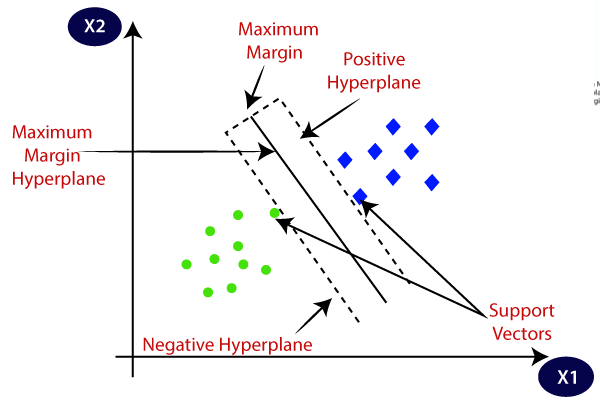

📌 ¿Cómo se seleccionan?
Se entrena el modelo SVM con el conjunto de datos.

El algoritmo encuentra la mejor frontera de decisión (hiperplano).

Los puntos que están justo sobre el margen o lo violan son marcados como vectores de soporte.

Los vectores de soporte se calculan a partir de la data.
Son cruciales en el entrenamiento de SVM porque son los únicos puntos que determinan el hiperplano de separación.

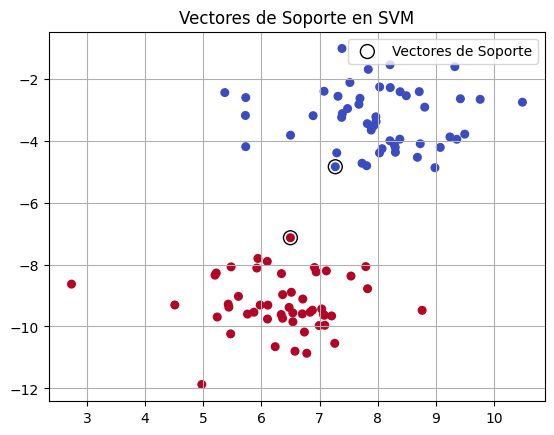

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Datos simples 2D
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Visualizar datos y vectores de soporte
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Vectores de Soporte')
plt.legend()
plt.title('Vectores de Soporte en SVM')
plt.grid(True)
plt.show()


## **Problema de Optimización**

Para encontrar el hiperplano óptimo, se formula un problema de optimización cuadrática (QP) con restricciones de igualdad y desigualdad. La solución a este problema se encuentra utilizando multiplicadores de Lagrange, lo que permite resolver un problema dual en lugar del problema primal.

Nota: quiero que los datos se separen pero no mucho , no quiero una dimension muy alta y que los datos este muy separados , pero se detiene en una condicion .

## **Kernels**:
Elegir el mejor kernel para un problema con SVM no tiene una única respuesta universal, pero sí existen criterios, pruebas y buenas prácticas que te ayudarán a tomar una decisión informada.



## **Uso en Inteligencia Artificial**

Las SVM se utilizan ampliamente en aplicaciones de IA, especialmente en las siguientes áreas:

- **Clasificación de texto**: Por ejemplo, en la clasificación de correos electrónicos en spam o no spam. Google mejoro su algoritmo para separar mejor las clases con la generacion de nuevas dimensiones para hacerlos linealmente separables
- **Reconocimiento de imágenes**: Para identificar objetos o personas en imágenes. En datasets de baja dimensionalidad, se pueden generar más características para mejorar la clasificación. Reconocimiento en porterias si tengo un dataset de baja dimensionalidad es muy util. Artificionsamente aumento la dimensionalidad .
- **Biomedicina**: Para clasificar genes, proteínas o tipos de células. # 5 marcadores geneticos y necesito realmente 10 , puede mejorar pero pasara tambien que necesito irme de nuevo al mundo real a traer mas datos
- **Finanzas**: Para predecir el riesgo crediticio o detectar fraudes.

Las SVM son particularmente útiles en casos donde el número de dimensiones es mayor que el número de muestras y en problemas donde se busca una clasificación robusta con un margen máximo. Aunque pueden ser menos eficientes en grandes conjuntos de datos con millones de muestras, siguen siendo una herramienta poderosa en muchas aplicaciones de IA.


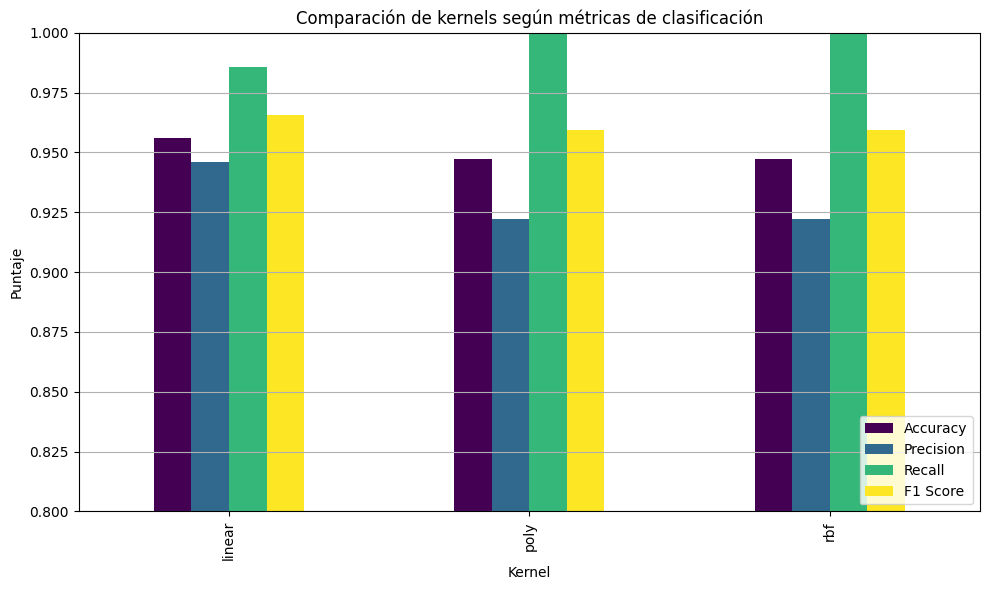

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Cargar dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de kernels a evaluar
kernels = ['linear', 'poly', 'rbf']
metrics_results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Entrenar y evaluar modelos
for kernel in kernels:
    if kernel == 'poly':
        clf = SVC(kernel=kernel, degree=3, gamma='scale')
    else:
        clf = SVC(kernel=kernel, gamma='scale')

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Métricas
    metrics_results['Kernel'].append(kernel)
    metrics_results['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics_results['Precision'].append(precision_score(y_test, y_pred))
    metrics_results['Recall'].append(recall_score(y_test, y_pred))
    metrics_results['F1 Score'].append(f1_score(y_test, y_pred))

# DataFrame para graficar
df_metrics = pd.DataFrame(metrics_results)
df_metrics.set_index('Kernel', inplace=True)

# Gráfico
df_metrics.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Comparación de kernels según métricas de clasificación')
plt.ylabel('Puntaje')
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


🧠 Recomendación práctica:
Si necesitas precisión alta y datos simples: usa linear.

Si necesitas no perder ningún positivo (por ejemplo, detectar enfermedades, fraudes, etc.¿De todos los casos positivos que había, cuántos encontró el modelo?): usa rbf o poly.

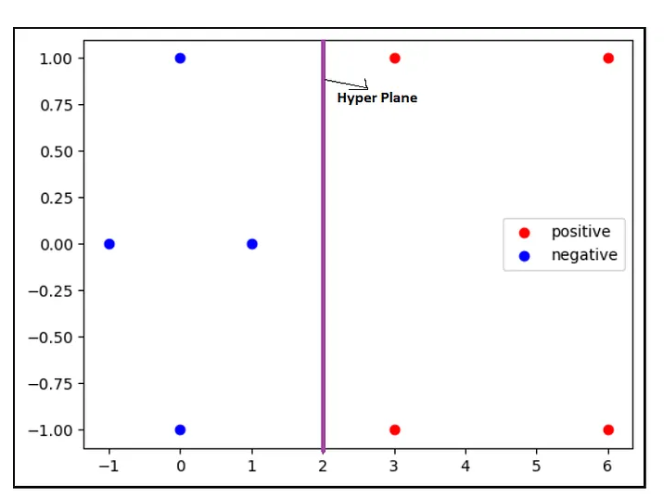

la representación gráfica de un hiperplano en una SVM que separa dos clases: una clase "positiva" (en rojo) y una clase "negativa" (en azul). El hiperplano se encuentra en el centro y actúa como la frontera de decisión entre las dos clases. En una SVM, la maximización del margen implica alejar los vectores de soporte (los puntos de datos más cercanos al hiperplano) tanto como sea posible del hiperplano, creando así una separación clara entre las dos clases.

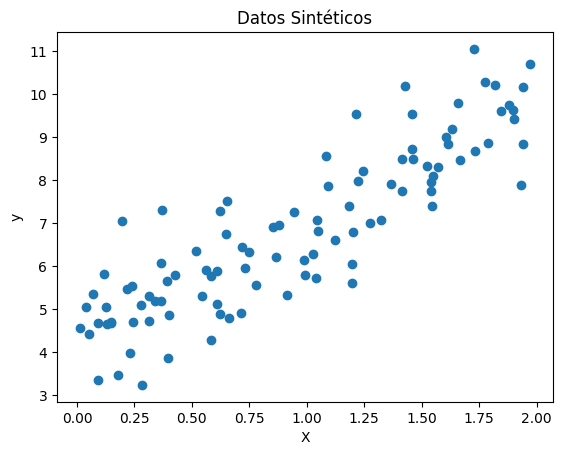

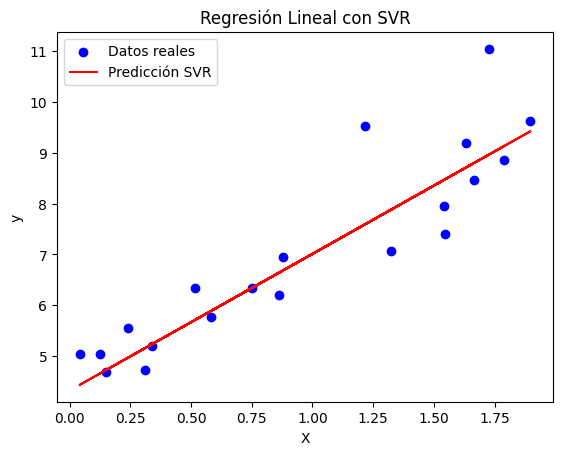

Error Cuadrático Medio (MSE) - SVR Lineal: 0.620
Coeficiente de determinación (R²) - SVR Lineal: 0.817
Coeficiente del modelo SVR (pendiente): [[2.69061482]]


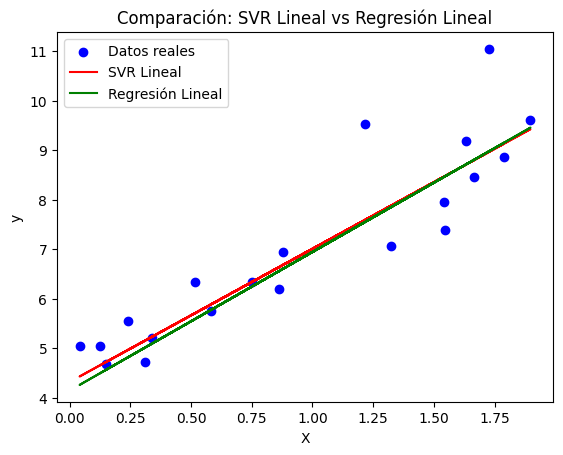

Regresión Lineal - MSE: 0.654, R²: 0.807


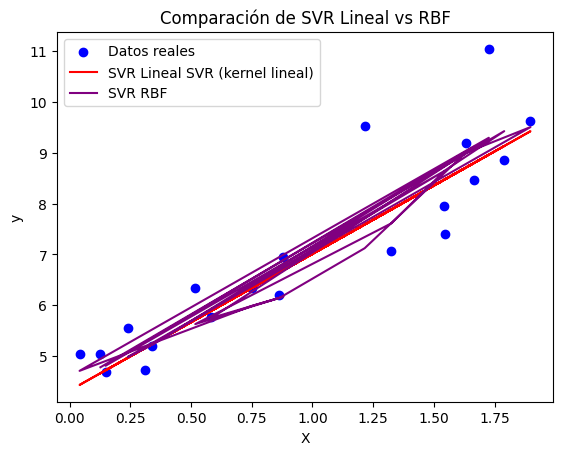

In [ ]:
# 📦 Importación de bibliotecas necesarias
# ---------------------------------------
# NumPy y Pandas para manipulación de datos,
# Matplotlib para visualización,
# Scikit-learn para regresión SVM y evaluación del modelo.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# 🎲 Generación de datos sintéticos
# ----------------------------------
# Creamos datos con relación lineal: y = 4 + 3x + ruido aleatorio
np.random.seed(42)
X = 2 * np.random.rand(100, 1)           # 100 valores entre 0 y 2
y = 4 + 3 * X + np.random.randn(100, 1)  # relación lineal + ruido

# 📊 Visualización de los datos generados
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Datos Sintéticos")
plt.show()

# 🧪 División de datos en entrenamiento y prueba
# ---------------------------------------------
# Usamos el 80% de los datos para entrenamiento y el 20% para prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔧 Definición del modelo SVR (Regresión SVM)
# ---------------------------------------------
# Creamos un modelo de SVR con kernel lineal (como regresión lineal).
svr_lin = SVR(kernel='linear')

# 🏋️‍♂️ Entrenamiento del modelo
# ------------------------------
# Entrenamos el modelo con los datos de entrenamiento.
svr_lin.fit(X_train, y_train.ravel())  # .ravel() convierte y_train en vector plano

# 🔮 Predicción sobre el conjunto de prueba
y_pred = svr_lin.predict(X_test)

# 📈 Visualización de la regresión SVR lineal
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicción SVR')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresión Lineal con SVR")
plt.legend()
plt.show()

# 📐 Evaluación del modelo - Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE) - SVR Lineal: {mse:.3f}")

# 📏 Evaluación del modelo - Coeficiente de determinación R²
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²) - SVR Lineal: {r2:.3f}")

# 📉 Coeficiente del modelo (pendiente)
# Solo disponible en modelos lineales
coef = svr_lin.coef_
print(f"Coeficiente del modelo SVR (pendiente): {coef}")

# ⚖️ Comparación con regresión lineal clásica
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_lin_pred = lin_reg.predict(X_test)

# Visualización comparativa
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='SVR Lineal')
plt.plot(X_test, y_lin_pred, color='green', label='Regresión Lineal')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparación: SVR Lineal vs Regresión Lineal")
plt.legend()
plt.show()

# 🧾 Métricas de regresión lineal
mse_lin = mean_squared_error(y_test, y_lin_pred)
r2_lin = r2_score(y_test, y_lin_pred)
print(f"Regresión Lineal - MSE: {mse_lin:.3f}, R²: {r2_lin:.3f}")

# 💬 Discusión
# SVR puede ser más robusto frente a outliers (al usar margen y tolerancia),
# y puede adaptarse mejor a datos no lineales si se usa otro kernel.

# 🌀 Prueba con SVR no lineal (kernel RBF)
svr_rbf = SVR(kernel='rbf')  # kernel radial no lineal
svr_rbf.fit(X_train, y_train.ravel())
y_rbf_pred = svr_rbf.predict(X_test)

# Visualización de SVR RBF comparado con lineal
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='SVR Lineal SVR (kernel lineal)')
plt.plot(X_test, y_rbf_pred, color='purple', label='SVR RBF')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparación de SVR Lineal vs RBF")
plt.legend()
plt.show()


## 🔹 Elementos del gráfico

- 🔵 **Puntos azules**:  
  Representan los **datos reales** del conjunto de prueba.

- 🔴 **Línea roja (SVR Lineal)**:  
  Predicción hecha por un modelo **SVR con kernel lineal**.  
  Es una **línea recta** ajustada al patrón general de los datos.

- 🟣 **Línea morada (SVR RBF)**:  
  Predicción hecha por un modelo **SVR con kernel RBF (Radial Basis Function)**, que permite **mayor flexibilidad** y curvatura.  
  Aunque los datos siguen una tendencia lineal, el modelo RBF puede **capturar mejor pequeñas variaciones no lineales**, si las hay.

  ## 🧠 Interpretación del gráfico

El gráfico compara el rendimiento de dos modelos de regresión SVR aplicados a datos con tendencia lineal:

- Ambos modelos, **SVR Lineal** y **SVR RBF**, siguen correctamente la dirección creciente de los datos reales.
- La **SVR Lineal** genera una predicción más simple y estable, adecuada cuando la relación entre variables es principalmente lineal.
- La **SVR RBF** ofrece mayor capacidad de adaptación y puede capturar **pequeñas variaciones** o **curvaturas locales** en los datos.

### ✅ Conclusión:
> En este caso, donde los datos son mayormente lineales, **SVR Lineal es suficiente y más interpretable**.  
> Sin embargo, si los datos presentaran comportamientos más complejos o no lineales, **SVR con kernel RBF podría ofrecer mejores resultados**.



#KERNEL NO LINEAL RBF

> 💡 **NOTA SUPER IMPORTANTE: Comparación entre SVM y SVD**

---

## 🔷 SVM (Máquinas de Vectores de Soporte) y el Kernel RBF

El **kernel de base radial (RBF)** utiliza una función gaussiana para calcular la **similitud** entre puntos en un espacio transformado. Este kernel permite mapear los datos originales (no linealmente separables) a un espacio de mayor dimensión, donde es posible **trazarlos como si fueran lineales**.

- Los **vectores de soporte** son los puntos clave que definen el **margen óptimo** entre clases.
- La optimización en SVM **aumenta la dimensionalidad** hasta encontrar un **hiperplano** que logre separar correctamente las clases.
- SVM **itera** y ajusta el modelo hasta que las clases se vuelven **linealmente separables** en ese nuevo espacio de alta dimensión.

> 🎯 **Objetivo de SVM**: Ampliar el espacio para separar mejor las clases.

---

## 🔶 SVD (Descomposición en Valores Singulares)

A diferencia de SVM, la **SVD busca reducir la dimensionalidad** de los datos.

- Utiliza **autovalores y autovectores** para identificar los **ejes de mayor varianza**.
- Permite **eliminar dimensiones irrelevantes** (con varianza baja o nula), lo que resulta en una representación más compacta.
- Ayuda a **preservar la estructura más significativa** de los datos, reduciendo complejidad sin perder información relevante.

> 🎯 **Objetivo de SVD**: Comprimir los datos manteniendo su esencia (varianza).

---

## 🔄 Comparación Conceptual

| Característica       | SVM                                | SVD                              |
|----------------------|-------------------------------------|-----------------------------------|
| **Dirección**         | Aumenta dimensionalidad             | Reduce dimensionalidad            |
| **Propósito**         | Separar clases no lineales          | Comprimir datos conservando varianza |
| **Herramienta clave** | Kernel (ej. RBF)                    | Autovectores y autovalores        |
| **Uso típico**        | Clasificación o regresión           | Preprocesamiento, reducción de ruido, PCA |

---

### 🧠 En resumen:

- **SVM**: Amplía el espacio de características para **facilitar la separación** de clases difíciles.
- **SVD**: Condensa la información del conjunto de datos original, **preservando su estructura esencial** en menos dimensiones.

> ✨ Ambos buscan mejorar el análisis de datos, pero desde **perspectivas opuestas**.


### SVM en regresión

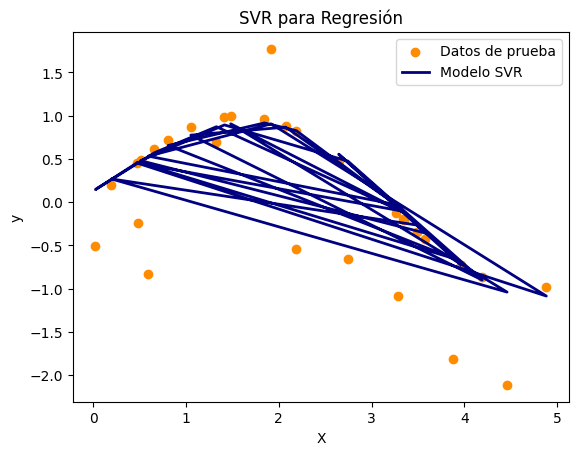

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR # maquina de soporte para la regresion
from sklearn.model_selection import train_test_split

# Generar datos de ejemplo artificiales
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Agregar ruido al modelo
y[::5] += 3 * (0.5 - np.random.rand(20))

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1) # instancio un kernel RBF va a aumentar las dimensiones hasta donde pueda # cambia a 100
svr_rbf.fit(X_train, y_train)

#C=100: Es el parámetro de regularización. Controla la compensación entre permitir un error menor en el entrenamiento
# y un margen mayor (más separación entre las clases). Un valor más alto de C da como resultado un modelo más ajustado, con menos margen

# Gamma=0.1: Que tanto el Kernel se deforma por las predicciones individuales si es bajo ( suave no se ve afectado por las observaciones underfitting)
# si es mas alto mas rugoso , puede hacer overfitting

#epsilon=0.1: Especifica la tolerancia al error en la predicción.
 #Un margen de error más grande se traduce en un modelo menos ajustado y más generalizado.

# Predecir con el modelo ajustado
y_pred = svr_rbf.predict(X_test) #Es un método del modelo de SVR que realiza predicciones sobre un conjunto de datos de prueba (X_test).

# Graficar los resultados
plt.scatter(X_test, y_test, color='darkorange', label='Datos de prueba')
plt.plot(X_test, y_pred, color='navy', lw=2, label='Modelo SVR')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR para Regresión')
plt.legend()
plt.show()


<ipython-input-30-b29363a6301f>:34: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


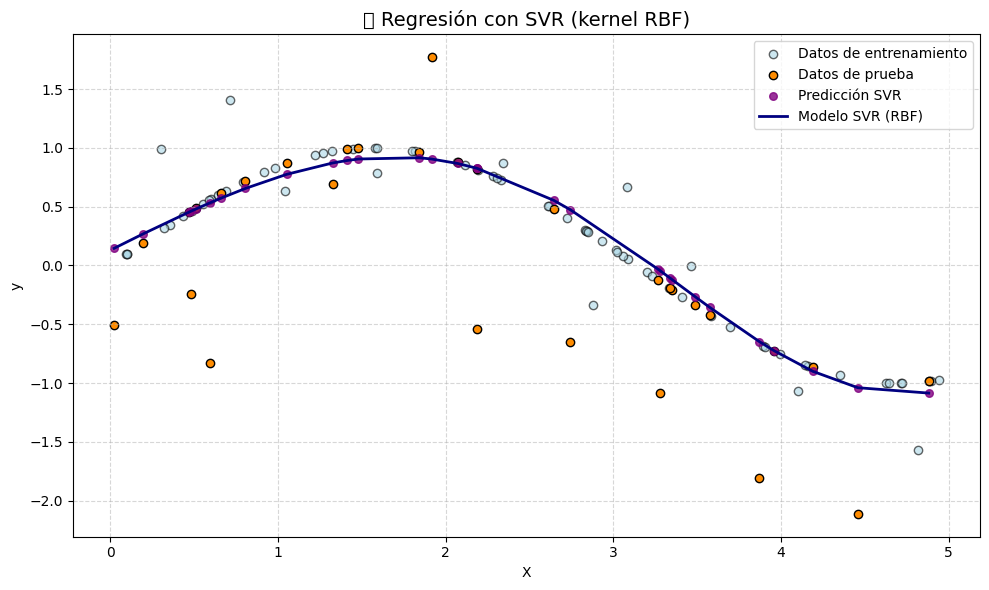

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# 🎲 Generar datos sintéticos con ruido
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(20))  # Agrega ruido a cada 5to dato

# 🔀 Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🔧 Crear y entrenar el modelo SVR con kernel RBF
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1) # gama 50
svr_rbf.fit(X_train, y_train)

# 🔮 Predicciones sobre el conjunto de prueba
y_pred = svr_rbf.predict(X_test)

# 📈 Visualización mejorada
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='lightblue', edgecolor='k', label='Datos de entrenamiento', alpha=0.6)
plt.scatter(X_test, y_test, color='darkorange', edgecolor='k', label='Datos de prueba')
plt.scatter(X_test, y_pred, color='purple', s=30, label='Predicción SVR', alpha=0.8)
plt.plot(np.sort(X_test.ravel()), y_pred[np.argsort(X_test.ravel())], color='navy', lw=2, label='Modelo SVR (RBF)')

plt.title('🌐 Regresión con SVR (kernel RBF)', fontsize=14)
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


El modelo SVR RBF ajusta correctamente la tendencia general del conjunto de datos, pero muestra zonas de alta variación debido a los valores de C y gamma.
Podrías mejorar la suavidad y generalización reduciendo gamma (menos rugosidad) o C (más tolerancia al error).

| Hiperparámetro | Analogía (explicación corta) | Si lo aumentas… | Señal práctica / Tip | Ejemplo scikit-learn |
|---|---|---|---|---|
| **C** (regularización) | **El policía de comparendos**: decide cuántas “excepciones” permite al trazar la frontera. | **C alto** ⇒ policía estricto: casi sin errores → ajusta muchísimo (**overfit**). **C bajo** ⇒ más permisos → frontera más simple (mejor generalización). | Si ves ~100% en *train* y bajo en *valid*, **baja `C`**. | `SVC(kernel="rbf", C=10)` • `SVR(C=10)` • `LinearSVC(C=0.5)` |
| **gamma** (RBF/Poly/Sigmoid) | **Radio de tu linterna**: qué tan lejos “alumbra” cada punto. | **γ alto** ⇒ luz muy concentrada → fronteras súper onduladas (**overfit**). **γ bajo** ⇒ luz amplia → fronteras suaves (**underfit** si te pasas). | Empieza con **`gamma="scale"`** y ajusta según validación. | `SVC(kernel="rbf", gamma=1)` • `SVR(kernel="rbf", gamma=0.1)` |
| **epsilon** (SVR/LinearSVR) | **Grosor del tubo** que no penaliza en regresión ε-insensible. | **ε grande** ⇒ ignora más errores pequeños (más robusto, menos detalle). **ε pequeño** ⇒ penaliza casi todo (ajuste fino, riesgo a ruido). | Ajusta **ε** según el **ruido de *y***; reporta MAE/RMSE. | `SVR(epsilon=0.2)` • `LinearSVR(epsilon=0.1)` |
| **kernel** | **Tipo de lentes** que usas para ver la relación. | Cambia la **forma** de la frontera: `linear` (recta), `rbf` (curva versátil), `poly` (interacciones orden 2–3), `sigmoid` (raro). | Parte con **`rbf`**; usa **`linear`** si relación ~lineal o d≫n. | `SVC(kernel="linear")`, `SVC(kernel="rbf")`, `SVC(kernel="poly", degree=3)` |
| **class_weight** (clasificación) | **Dar voz a la minoritaria** en clases desbalanceadas. | Aumenta el **recall** de la clase minoritaria (cambia la frontera). | Usa **`class_weight="balanced"`** y ajusta **umbral**; mira **F1 por clase** / PR-AUC. | `SVC(class_weight="balanced")` • `LinearSVC(class_weight="balanced")` |


### Clasificación

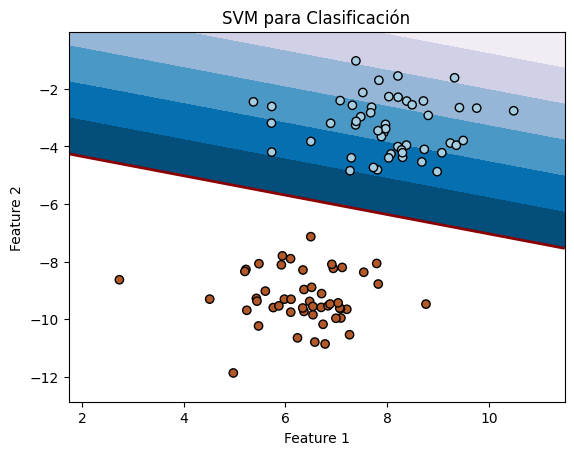

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Generar datos de ejemplo
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Crear y ajustar el modelo SVC
clf = svm.SVC(kernel='linear', C=1.0) #svc kernel lineal SVC clasificacion 'sigmoid'
clf.fit(X, y)

# Crear un grid para visualizar el hiperplano
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

# Predecir sobre el grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los resultados
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM para Clasificación')
plt.show()
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

El modelo traza un plano , aumentanto las caracteristicas y la dimensionalidad Cambie el parametro SCV para sigmoide

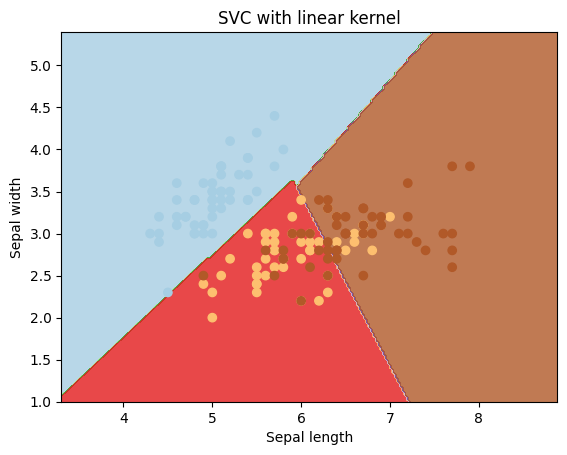

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

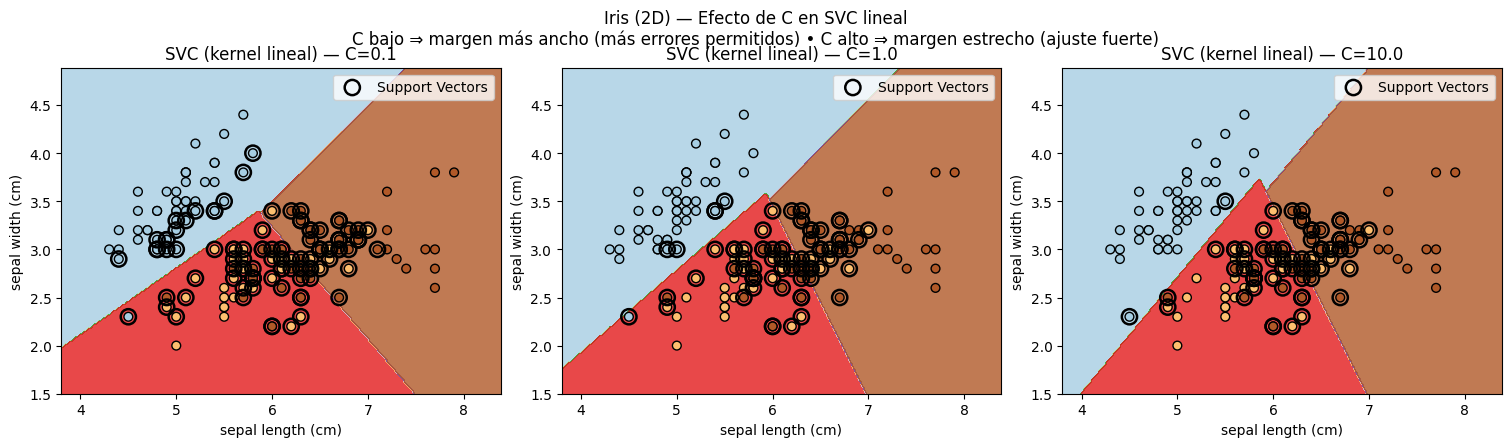

In [2]:
# %% Mejor visualización de SVM lineal en Iris (2 features)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1) Datos: Iris (2 primeras columnas para poder graficar en 2D)
iris = datasets.load_iris()
X = iris.data[:, :2]   # Sepal length, Sepal width
y = iris.target
feature_names = iris.feature_names[:2]

# 2) Función para graficar regiones de decisión y soportes
def plot_svc_linear(ax, C=1.0):
    """
    Entrena un SVC lineal con C dado dentro de un Pipeline(StandardScaler->SVC),
    pinta regiones de decisión y resalta los vectores de soporte.
    """
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", svm.SVC(kernel="linear", C=C, decision_function_shape="ovr", random_state=42))
    ])
    model.fit(X, y)

    # Malla (grid) para evaluar el clasificador
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = (x_max - x_min) / 300.0  # paso fino y estable
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predicción en la malla (el Pipeline escala internamente)
    Z = model.predict(grid).reshape(xx.shape)

    # Fondo con regiones de decisión
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Datos reales
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor="k", s=40)

    # Vectores de soporte: necesitamos índices desde el estimador dentro del pipeline
    svc_est = model.named_steps["svc"]
    sv_idx = svc_est.support_              # índices en X original (pipeline no altera el índice)
    ax.scatter(X[sv_idx, 0], X[sv_idx, 1],
               s=120, facecolors="none", edgecolors="black", linewidths=1.8, label="Support Vectors")

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(f"SVC (kernel lineal) — C={C}")
    ax.legend(loc="upper right", frameon=True)

# 3) Comparación de C (regularización)
fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)
for ax, C in zip(axes, [0.1, 1.0, 10.0]):
    plot_svc_linear(ax, C=C)

fig.suptitle("Iris (2D) — Efecto de C en SVC lineal\n"
             "C bajo ⇒ margen más ancho (más errores permitidos) • C alto ⇒ margen estrecho (ajuste fuerte)", y=1.08)
plt.show()


# ⚙️ Hiperparámetros importantes en SVM (`sklearn.svm.SVC`)

## 1. `kernel` (str)
Define el tipo de transformación que se aplicará a los datos para encontrar una frontera de decisión en un espacio de mayor dimensión.

- `'linear'`: separa con una línea/hiperplano recto.
- `'rbf'`: kernel gaussiano, permite fronteras curvas (más común).
- `'poly'`: kernel polinomial.
- `'sigmoid'`: menos usado, parecido a una neurona de red.

> **Valor por defecto**: `'rbf'`

---

## 2. `C` (float)
Controla la **penalización por errores de clasificación**.

- Valor bajo → permite más errores (modelo más simple, menos sobreajuste).
- Valor alto → intenta clasificar todo bien (riesgo de sobreajuste).

> Es una forma de **regularización inversa**.  
> **Por defecto**: `C = 1.0`

---

## 3. `gamma` (float o `'scale'`, `'auto'`)
Determina **cuánto influye un solo ejemplo** en la frontera de decisión (solo para kernels `'rbf'`, `'poly'` o `'sigmoid'`).

- Valor bajo → influencia lejana → frontera más suave.
- Valor alto → influencia muy local → puede sobreajustar.

> **Recomendación**: usar `'scale'` o `'auto'` al inicio.  
> **Por defecto**: `'scale'` (escalado en función de la varianza de `X`)

---

## 4. `degree` (int)
Aplica solo cuando `kernel='poly'`. Indica el **grado del polinomio**.

- `degree=2` → cuadrático
- `degree=3` → cúbico (por defecto)
- Grados más altos → más complejidad

> **Por defecto**: `degree = 3`

---

## 5. `coef0` (float)
Término independiente en kernels `'poly'` y `'sigmoid'`.

- Afecta la forma del modelo cuando se usan funciones no lineales.
- Útil cuando `kernel='poly'` y deseas controlar el sesgo.

> **Por defecto**: `coef0 = 0.0`

---

## 🎯 ¿Qué hiperparámetros ajustar primero?

| Kernel      | Ajustar                 |
|-------------|-------------------------|
| `'linear'`  | Solo `C`                |
| `'rbf'`     | `C`, `gamma`            |
| `'poly'`    | `C`, `degree`, `gamma`  |
| `'sigmoid'` | `C`, `gamma`, `coef0`   |

---

## 🧪 Consejo práctico
Usa `GridSearchCV` o `RandomizedSearchCV` para buscar las mejores combinaciones de `C` y `gamma` (y `degree` si usas kernel polinomial).

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)


🔍 Mejor combinación de hiperparámetros encontrada:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

📊 Comparación de modelos SVM:


,Modelo,Accuracy,F1 Score
2,SVM RBF (por defecto),0.886667,0.879433
3,SVM RBF optimizado,0.873333,0.865248
0,SVM lineal,0.853333,0.847222
1,SVM polinomial,0.820000,0.800000


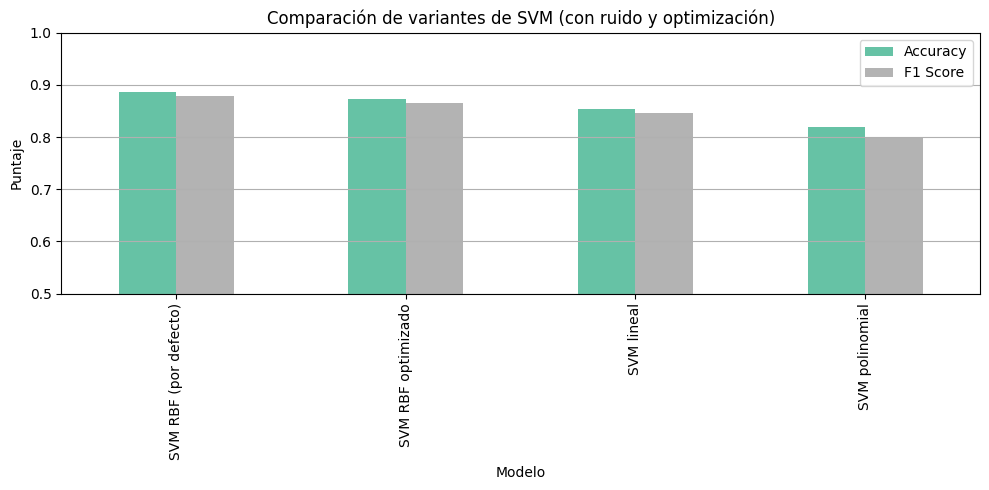


✅ Mejor modelo: SVM RBF (por defecto)
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        75
           1       0.94      0.83      0.88        75

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



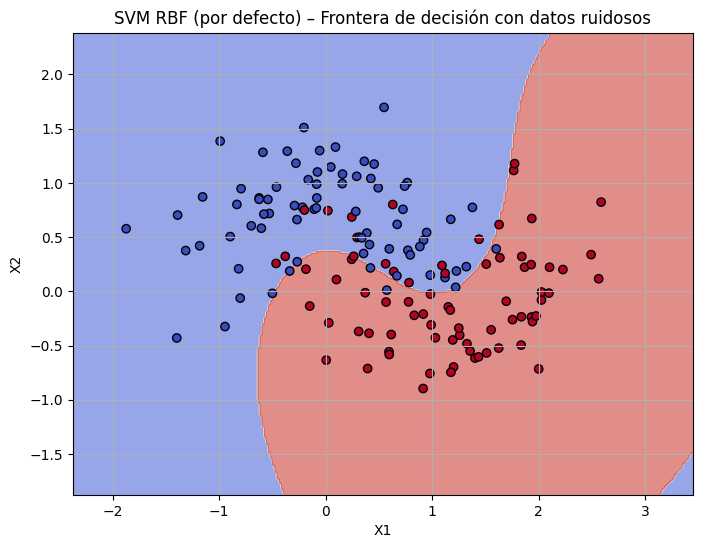

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Generar datos no lineales (con ruido mayor para resaltar la diferencia)
X, y = make_moons(n_samples=500, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. OPTIMIZACIÓN DEL SVM RBF CON VALIDACIÓN CRUZADA (GridSearch)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid_rbf = GridSearchCV(SVC(), param_grid, cv=5)
grid_rbf.fit(X_train, y_train)
svm_rbf_optimo = grid_rbf.best_estimator_

print(f"🔍 Mejor combinación de hiperparámetros encontrada:\n{grid_rbf.best_params_}")

# 3. Definir modelos SVM (optimizado y sin optimizar)
modelos = {
    'SVM lineal': SVC(kernel='linear'),
    'SVM polinomial': SVC(kernel='poly', degree=3),
    'SVM RBF (por defecto)': SVC(kernel='rbf'),         # sin tuning
    'SVM RBF optimizado': svm_rbf_optimo                # con tuning
}

# 4. Entrenamiento y evaluación
resultados = []
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    resultados.append({
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# 5. Tabla comparativa
df_resultados = pd.DataFrame(resultados).sort_values(by='F1 Score', ascending=False)
print("\n📊 Comparación de modelos SVM:")
display(df_resultados)

# 6. Gráfico comparativo
df_resultados.set_index('Modelo').plot(kind='bar', figsize=(10, 5), colormap='Set2')
plt.title("Comparación de variantes de SVM (con ruido y optimización)")
plt.ylabel("Puntaje")
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 7. Evaluación final del mejor modelo
mejor_modelo_nombre = df_resultados.iloc[0]['Modelo']
print(f"\n✅ Mejor modelo: {mejor_modelo_nombre}")
mejor_modelo = modelos[mejor_modelo_nombre]
y_pred_final = mejor_modelo.predict(X_test)
print(classification_report(y_test, y_pred_final))

# 8. Visualización de frontera de decisión del mejor modelo
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = mejor_modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title(f'{mejor_modelo_nombre} – Frontera de decisión con datos ruidosos')
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()




LinearSVC (lineal)         Acc=0.833  F1=0.842
LinearSVC + Poly(deg=3)    Acc=0.900  F1=0.900
SVC RBF (kernel trick)     Acc=0.911  F1=0.912
SVC Poly(deg=3)            Acc=0.917  F1=0.918


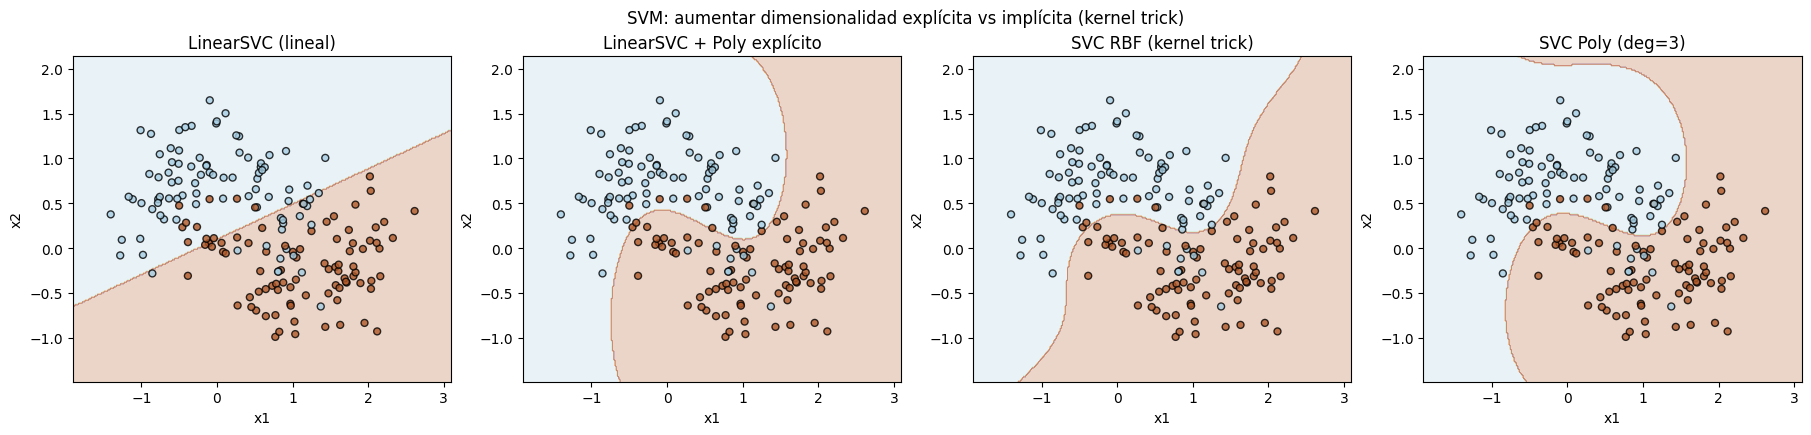

LinearSVR (lineal)      MAE=0.359  RMSE=0.490  R²=0.468
SVR RBF (kernel)        MAE=0.075  RMSE=0.098  R²=0.979


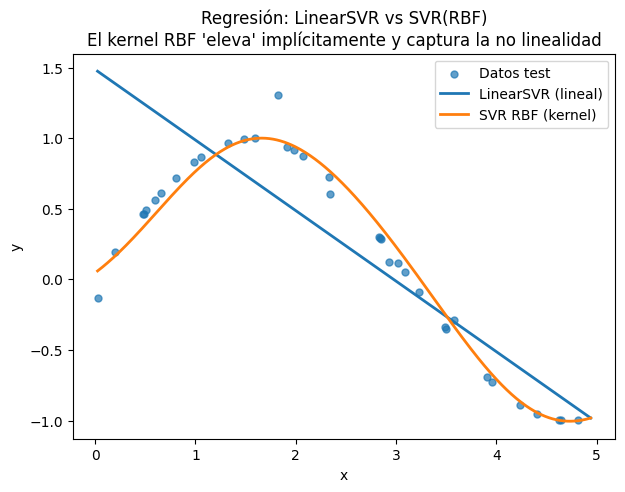

In [4]:
# %% ---------------------------------------
# SVM: kernel trick = aumento implícito de dimensionalidad
# Demostración en clasificación no lineal (make_moons)
# ---------------------------------------
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

# 1) Datos no linealmente separables
X, y = make_moons(n_samples=600, noise=0.30, random_state=42)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Helper de métricas
def metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred)
    print(f"{name:25s}  Acc={acc:.3f}  F1={f1:.3f}")

# Helper de malla para dibujar fronteras
def plot_decision_boundary(ax, model, X, y, title):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    h = (x_max - x_min) / 300.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.25, cmap=plt.cm.Paired)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, edgecolor="k", s=25, alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("x1"); ax.set_ylabel("x2")

# 2) Modelos a comparar
# 2.1) Lineal (NO incrementa dimensiones): baseline
clf_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("lin", LinearSVC(C=1.0, random_state=42))
])
clf_linear.fit(Xtr, ytr)
pred_lin = clf_linear.predict(Xte)
metrics("LinearSVC (lineal)", yte, pred_lin)

# 2.2) Mapeo EXPLÍCITO a mayor dimensionalidad (polinomios) + lineal
#     Esto emula "aumentar dimensionalidad" manualmente.
clf_poly_explicit = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),  # eleva a 3er grado
    ("scaler", StandardScaler(with_mean=False)),                # con sparse/alto d, evita centrar
    ("lin", LinearSVC(C=1.0, random_state=42))
])
clf_poly_explicit.fit(Xtr, ytr)
pred_poly = clf_poly_explicit.predict(Xte)
metrics("LinearSVC + Poly(deg=3)", yte, pred_poly)

# 2.3) Kernel RBF (aumento IMPLÍCITO de dimensionalidad con kernel trick)
clf_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42))
])
clf_rbf.fit(Xtr, ytr)
pred_rbf = clf_rbf.predict(Xte)
metrics("SVC RBF (kernel trick)", yte, pred_rbf)

# 2.4) Kernel Polinómico (implícito) para comparar
clf_poly_kernel = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="poly", degree=3, coef0=1.0, C=1.0, gamma="scale", random_state=42))
])
clf_poly_kernel.fit(Xtr, ytr)
pred_poly_k = clf_poly_kernel.predict(Xte)
metrics("SVC Poly(deg=3)", yte, pred_poly_k)

# 3) Visualización de fronteras (comparativa)
fig, axes = plt.subplots(1, 4, figsize=(18,4), constrained_layout=True)
plot_decision_boundary(axes[0], clf_linear,        Xte, yte, "LinearSVC (lineal)")
plot_decision_boundary(axes[1], clf_poly_explicit, Xte, yte, "LinearSVC + Poly explícito")
plot_decision_boundary(axes[2], clf_rbf,           Xte, yte, "SVC RBF (kernel trick)")
plot_decision_boundary(axes[3], clf_poly_kernel,   Xte, yte, "SVC Poly (deg=3)")
fig.suptitle("SVM: aumentar dimensionalidad explícita vs implícita (kernel trick)", y=1.05)
plt.show()

# %% ---------------------------------------
# OPCIONAL: demostración en REGRESIÓN (no lineal)
# SVR(RBF) vs LinearSVR en una señal senoidal con ruido
# ---------------------------------------
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(0)
Xr = np.sort(5 * np.random.rand(120, 1), axis=0)
yr = np.sin(Xr).ravel()
yr[::7] += 0.7 * (0.5 - np.random.rand(yr[::7].size))  # ruido / outliers
Xr_tr, Xr_te, yr_tr, yr_te = train_test_split(Xr, yr, test_size=0.3, random_state=42)

def reg_report(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse) # Calculate RMSE manually
    r2 = r2_score(y_true, y_pred)
    print(f"{name:22s}  MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.3f}")

# Lineal (sin aumento de d)
reg_lin = Pipeline([
    ("scaler", StandardScaler()),
    ("lin", LinearSVR(C=1.0, epsilon=0.1, random_state=42, max_iter=5000))
]).fit(Xr_tr, yr_tr)
yrp_lin = reg_lin.predict(Xr_te)
reg_report("LinearSVR (lineal)", yr_te, yrp_lin)

# Kernel RBF (aumento implícito de d)
reg_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=5.0, gamma="scale", epsilon=0.1))
]).fit(Xr_tr, yr_tr)
yrp_rbf = reg_rbf.predict(Xr_te)
reg_report("SVR RBF (kernel)", yr_te, yrp_rbf)

# Plot de curvas de regresión
xgrid = np.linspace(Xr.min(), Xr.max(), 400).reshape(-1,1)
yline_lin = reg_lin.predict(xgrid)
yline_rbf = reg_rbf.predict(xgrid)

plt.figure(figsize=(7,5))
plt.scatter(Xr_te, yr_te, s=25, alpha=0.7, label="Datos test")
plt.plot(xgrid, yline_lin, lw=2, label="LinearSVR (lineal)")
plt.plot(xgrid, yline_rbf, lw=2, label="SVR RBF (kernel)")
plt.title("Regresión: LinearSVR vs SVR(RBF)\nEl kernel RBF 'eleva' implícitamente y captura la no linealidad")
plt.xlabel("x"); plt.ylabel("y"); plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔍 Comparación de modelos:


,Modelo,Accuracy,Precision,Recall,F1 Score
2,Random Forest,0.964912,0.958904,0.985915,0.972222
4,KNN,0.956140,0.934211,1.000000,0.965986
0,SVM (linear),0.956140,0.945946,0.985915,0.965517
3,Logistic Regression,0.956140,0.945946,0.985915,0.965517
1,SVM (rbf),0.947368,0.922078,1.000000,0.959459


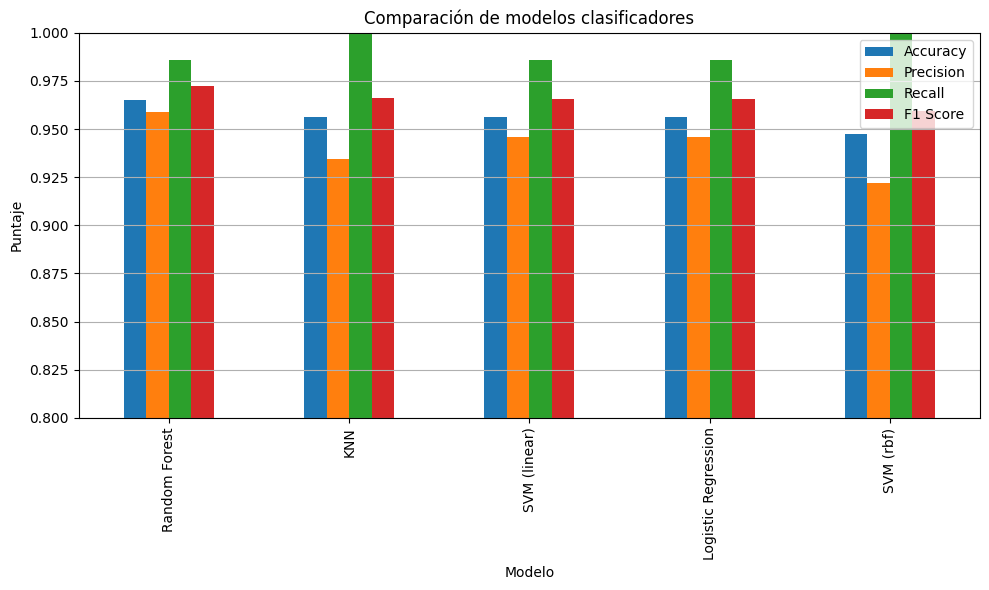


✅ Evaluación final del mejor modelo: Random Forest
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



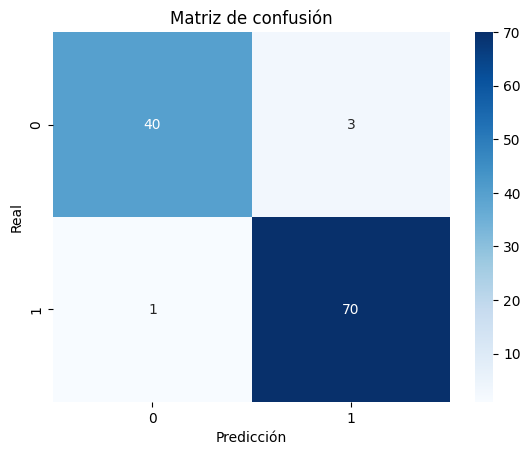

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar dataset
X, y = load_breast_cancer(return_X_y=True)

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Modelos a comparar
modelos = {
    'SVM (linear)': SVC(kernel='linear', gamma='scale'),
    'SVM (rbf)': SVC(kernel='rbf', gamma='scale'),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# 4. Evaluar cada modelo con cross-validation en el conjunto de entrenamiento
resultados = []
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    resultados.append({
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# 5. Crear DataFrame de resultados
df_resultados = pd.DataFrame(resultados).sort_values(by='F1 Score', ascending=False)
print("🔍 Comparación de modelos:")
display(df_resultados)

# 6. Graficar
df_resultados.set_index('Modelo')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de modelos clasificadores')
plt.ylabel('Puntaje')
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 7. Evaluar el mejor modelo con test
mejor_modelo_nombre = df_resultados.iloc[0]['Modelo']
mejor_modelo = modelos[mejor_modelo_nombre]
mejor_modelo.fit(X_train, y_train)
y_pred_final = mejor_modelo.predict(X_test)

print(f"\n✅ Evaluación final del mejor modelo: {mejor_modelo_nombre}")
print(classification_report(y_test, y_pred_final))

# 8. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


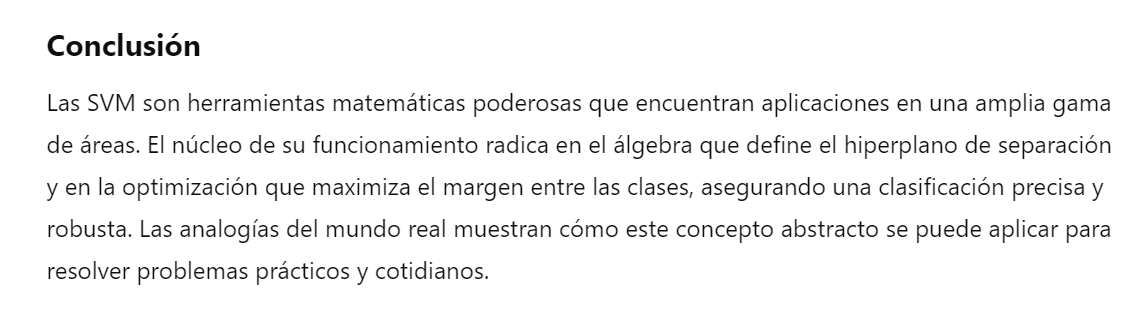

# 🎯 ¿Por qué usar SVM para evaluar si se necesitan más características?

En problemas de clasificación, no siempre es evidente si las características (variables) que tenemos son suficientes para que un modelo aprenda a separar correctamente las clases. Una forma poderosa de diagnosticar esta situación es usando **Máquinas de Vectores de Soporte (SVM)**.

---

## 🧠 ¿Qué hace una SVM?

Una SVM busca encontrar la mejor **frontera de decisión** que separe dos clases, maximizando el **margen** (la distancia entre los datos y la frontera). Si las clases **no se pueden separar bien con las variables actuales**, la SVM te lo hará evidente de forma visual o numérica.

---

## ✅ ¿Cómo ayuda esto a detectar si faltan variables?

- Si el modelo necesita **muchos vectores de soporte**, está forzado a apoyarse en muchos ejemplos para separar las clases.
- Si el **margen es muy estrecho**, significa que la separación entre clases no es clara.
- Si ni siquiera un **SVM con kernel no lineal y parámetros optimizados** logra buenos resultados, es una señal de que **las características actuales no contienen la información suficiente** para resolver el problema.

---

## 🔍 Ventajas de usar SVM para este diagnóstico:

- Funciona bien tanto en espacios **lineales como no lineales**.
- Es sensible a la **calidad de las variables**, no solo a su cantidad.
- Puedes **visualizar fácilmente** la separación y el margen en problemas de 2D o 3D.

---

> En resumen, una SVM no solo sirve como modelo de clasificación, sino también como herramienta para diagnosticar **la capacidad de tus variables para separar las clases**. Si incluso con una SVM bien ajustada no logras buenos resultados, es hora de recolectar más o mejores características.


# 🧠 ¿Cómo saber si necesitas recolectar más características usando SVM?

Una Máquina de Vectores de Soporte (SVM), especialmente con kernels no lineales y optimización de hiperparámetros, puede ayudarte a diagnosticar si las variables actuales son suficientes para resolver tu problema de clasificación.

---

## 🔍 1. Bajo rendimiento incluso tras optimización
Si después de probar:
- Distintos **kernels** (`linear`, `rbf`, `poly`),
- **Optimización de hiperparámetros** (`C`, `gamma`) con GridSearchCV,
- **Estandarización** de los datos,

...el modelo sigue teniendo bajo rendimiento (por ejemplo, F1-score < 0.7), es una señal de que **las variables actuales no permiten una buena separación entre clases**.

---

## 📈 2. Visualización PCA o t-SNE no muestra separación clara
Puedes reducir las dimensiones con PCA o t-SNE y graficar:



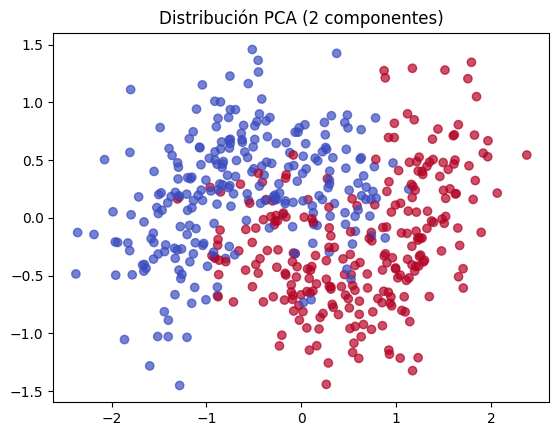

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("Distribución PCA (2 componentes)")
plt.show()

## 🧪 3. Revisión del margen en SVM lineal

Entrena una SVM con `kernel='linear'` y analiza dos aspectos importantes:

- **Tamaño del margen**: si es muy pequeño, el modelo está forzado a ajustar mucho para separar las clases.
- **Cantidad de vectores de soporte**: si hay muchos, es señal de que **los datos no están bien separados en el espacio actual de características**.

In [ ]:
from sklearn.svm import SVC

svm_lineal = SVC(kernel='linear')
svm_lineal.fit(X_train, y_train)

print(f"Número de vectores de soporte: {len(svm_lineal.support_)}")

Número de vectores de soporte: 132


🧠 Interpretación:
Muchos vectores de soporte ⇒ el modelo necesita apoyo de demasiados puntos para construir la frontera.
Esto sugiere que las variables actuales no son suficientes para lograr una buena separación entre clases.

Vectores de soporte por clase: [66 66]
Total: 132


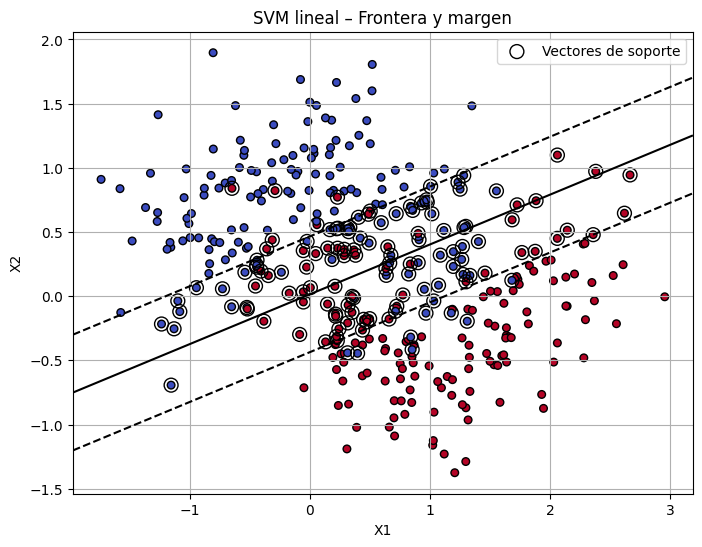

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Entrenar SVM lineal
svm_lineal = SVC(kernel='linear')
svm_lineal.fit(X_train, y_train)

# Mostrar número de vectores de soporte
print("Vectores de soporte por clase:", svm_lineal.n_support_)
print("Total:", svm_lineal.n_support_.sum())

# Visualización del margen (solo funciona en 2D)
def plot_svm_margin(model, X, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')

    # Frontera de decisión
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Crear malla para visualizar la frontera
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Dibujar la frontera y los márgenes
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])

    # Dibujar vectores de soporte
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k', label='Vectores de soporte')

    plt.title("SVM lineal – Frontera y margen")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_svm_margin(svm_lineal, X_train, y_train)

Si la mayoría de los puntos cercanos a la frontera son vectores de soporte, significa que el modelo no tiene suficiente separación y está ajustando al límite.

Esto es una señal clara de que puedes necesitar recolectar nuevas o mejores variables para que el modelo generalice mejor

## 📊 4. Métricas desbalanceadas por clase

Puedes usar `classification_report` de `sklearn` para evaluar el desempeño del modelo por clase:

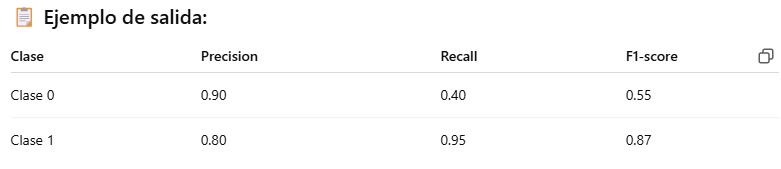


LinearSVC (lineal)            Acc=0.471  F1=0.498
LinearSVC + Poly(deg=2)       Acc=0.975  F1=0.975
SVC RBF (kernel trick)        Acc=0.979  F1=0.979


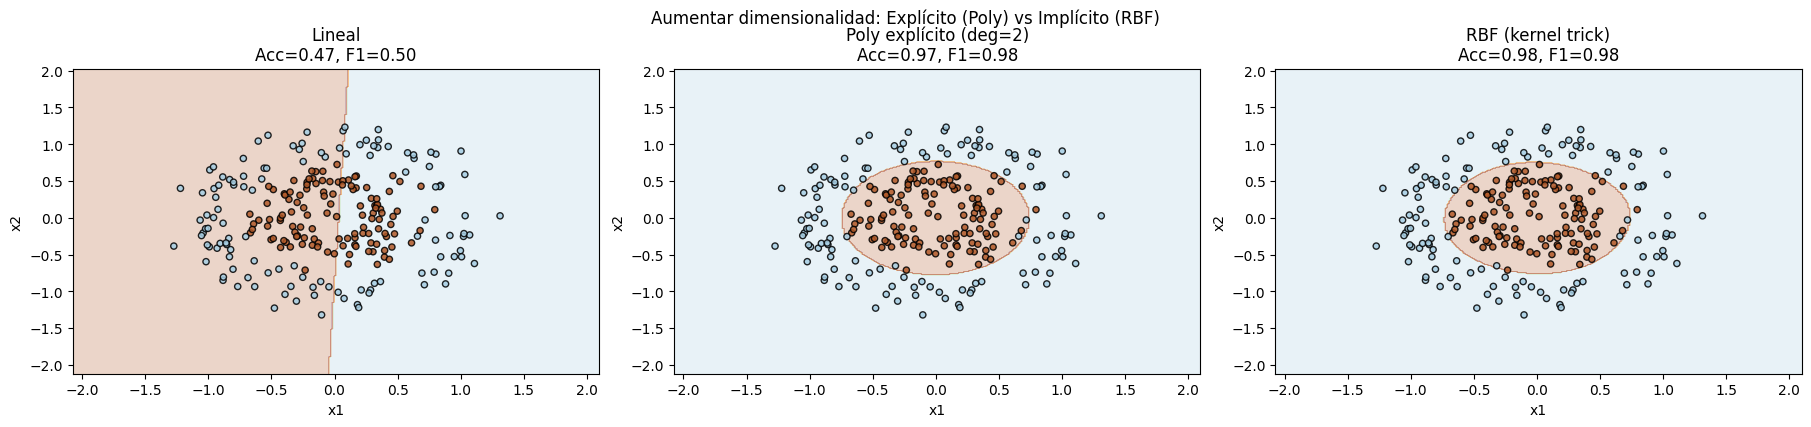

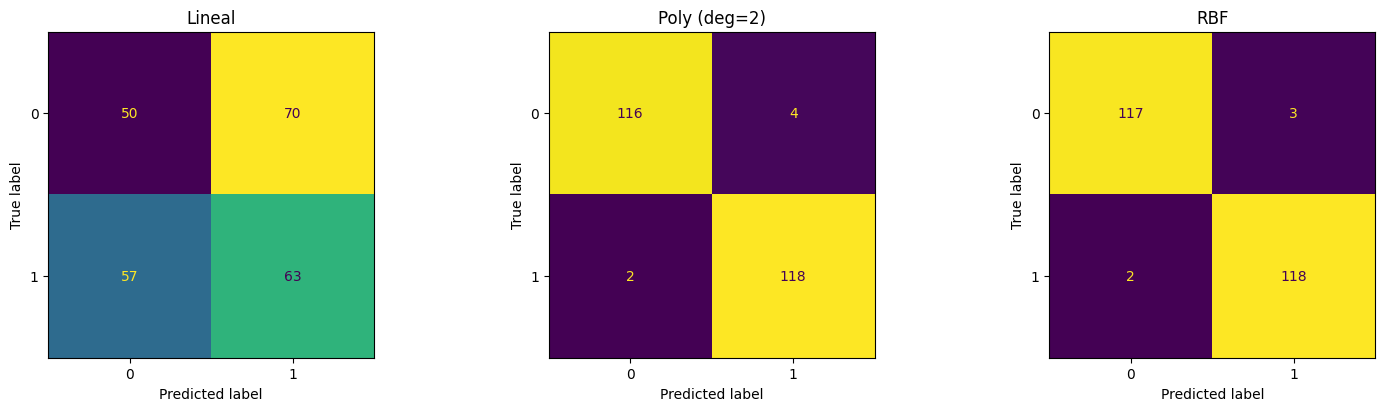

In [5]:
# %% ---------------------------------------
# Dataset que "requiere" aumentar la dimensionalidad: CÍRCULOS CONCÉNTRICOS
# ---------------------------------------
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 1) Datos no linealmente separables
X, y = make_circles(n_samples=800, factor=0.45, noise=0.15, random_state=42)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

def metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred)
    print(f"{name:28s}  Acc={acc:.3f}  F1={f1:.3f}")
    return acc, f1

# 2) Modelos a comparar
# 2.1) LINEAL (baseline: falla porque no hay frontera lineal posible en 2D)
clf_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("lin", LinearSVC(C=1.0, random_state=42))
]).fit(Xtr, ytr)
pred_lin = clf_linear.predict(Xte)
acc_lin, f1_lin = metrics("LinearSVC (lineal)", yte, pred_lin)

# 2.2) AUMENTO EXPLÍCITO de dimensionalidad (polinomios grado 2)
#     x1, x2 -> [x1, x2, x1^2, x1*x2, x2^2] donde la frontera CIRCULAR se vuelve lineal
clf_poly_explicit = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler(with_mean=False)),  # con alta d sparse, mejor no centrar
    ("lin", LinearSVC(C=1.0, random_state=42))
]).fit(Xtr, ytr)
pred_poly = clf_poly_explicit.predict(Xte)
acc_poly, f1_poly = metrics("LinearSVC + Poly(deg=2)", yte, pred_poly)

# 2.3) AUMENTO IMPLÍCITO (kernel trick) con RBF
clf_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42))
]).fit(Xtr, ytr)
pred_rbf = clf_rbf.predict(Xte)
acc_rbf, f1_rbf = metrics("SVC RBF (kernel trick)", yte, pred_rbf)

# 3) Fronteras de decisión para visualizar la diferencia
def plot_decision_boundary(ax, model, X, y, title):
    x_min, x_max = X[:,0].min()-0.8, X[:,0].max()+0.8
    y_min, y_max = X[:,1].min()-0.8, X[:,1].max()+0.8
    h = (x_max - x_min) / 300.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.25, cmap=plt.cm.Paired)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, s=20, edgecolor="k", alpha=0.85)
    ax.set_title(title)
    ax.set_xlabel("x1"); ax.set_ylabel("x2")

fig, axes = plt.subplots(1, 3, figsize=(18, 4), constrained_layout=True)
plot_decision_boundary(axes[0], clf_linear,        Xte, yte, f"Lineal\nAcc={acc_lin:.2f}, F1={f1_lin:.2f}")
plot_decision_boundary(axes[1], clf_poly_explicit, Xte, yte, f"Poly explícito (deg=2)\nAcc={acc_poly:.2f}, F1={f1_poly:.2f}")
plot_decision_boundary(axes[2], clf_rbf,           Xte, yte, f"RBF (kernel trick)\nAcc={acc_rbf:.2f}, F1={f1_rbf:.2f}")
fig.suptitle("Aumentar dimensionalidad: Explícito (Poly) vs Implícito (RBF)", y=1.03)
plt.show()

# 4) Matrices de confusión (comparativa)
fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)
for ax, (name, yhat) in zip(axes, [
    ("Lineal", pred_lin),
    ("Poly (deg=2)", pred_poly),
    ("RBF", pred_rbf),
]):
    ConfusionMatrixDisplay(confusion_matrix(yte, yhat)).plot(ax=ax, colorbar=False)
    ax.set_title(name)
plt.show()


# Algo de material extra

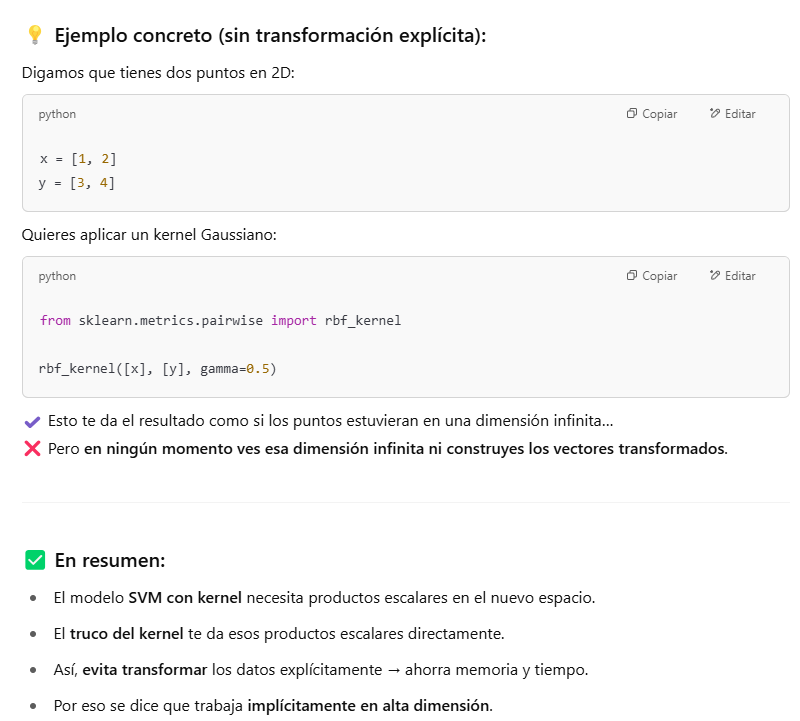